# 📊 Análisis de Tiendas - Alura Store

En este proyecto, analizaremos el desempeño de cuatro tiendas pertenecientes al Sr. Juan.  
El objetivo es identificar cuál de las tiendas presenta el menor rendimiento general y recomendar su venta, basándonos en análisis de:

- Facturación total
- Ventas por categoría
- Calificación promedio
- Productos más y menos vendidos
- Costos de envío promedio
- Rentabilidad general
- Comparación de múltiples métricas


# 📥 Importación de Librerías y Carga de Datos

En esta sección importamos las librerías necesarias y cargamos las bases de datos de las cuatro tiendas del Sr. Juan.
Esto nos permitirá trabajar y analizar la información para tomar decisiones estratégicas.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URLs de las bases de datos
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar los datos
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Verificamos uno de los archivos
tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


✅ Los datos fueron cargados exitosamente y ahora están listos para ser analizados.

# 🔗 Unión de Datos

Se consolidan los datos de las cuatro tiendas en un único DataFrame llamado `datos`, facilitando el análisis conjunto.


In [ ]:
# Agregar una columna para identificar cada tienda
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

# Unir todos los datos
datos = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Verificar que todo esté junto
datos.head(10)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1
5,Bloques de construcción,Juguetes,24200.0,0.0,03/12/2020,Beatriz Morales,Cali,5,Cupón,1,3.43722,-76.52250,Tienda 1
6,Muñeca bebé,Juguetes,44200.0,0.0,07/08/2021,Juan Fernandez,Bogotá,3,Nequi,1,4.60971,-74.08175,Tienda 1
7,Lavavajillas,Electrodomésticos,1189700.0,63700.0,18/06/2021,Felipe Santos,Santa Marta,5,Tarjeta de crédito,10,11.24079,-74.19904,Tienda 1
8,Lavadora de ropa,Electrodomésticos,1518200.0,79000.0,08/01/2022,Izabela de León,Bogotá,1,Tarjeta de crédito,5,4.60971,-74.08175,Tienda 1
9,Carrito de control remoto,Juguetes,75200.0,5100.0,24/02/2020,Beatriz Morales,Bogotá,5,Nequi,1,4.60971,-74.08175,Tienda 1


✅ Todos los registros fueron unidos exitosamente en un solo DataFrame.

## 💰 Análisis de Facturación Total

En este paso calculamos la facturación total (suma de ventas) de cada una de las cuatro tiendas.  
Esto nos permitirá identificar cuál tienda genera mayores ingresos y cuál presenta un desempeño comercial más bajo.

,Tienda,Suma Precio
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


<ipython-input-5-096f6b91d973>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_resultados, x='Tienda', y='Suma Precio', palette='crest')


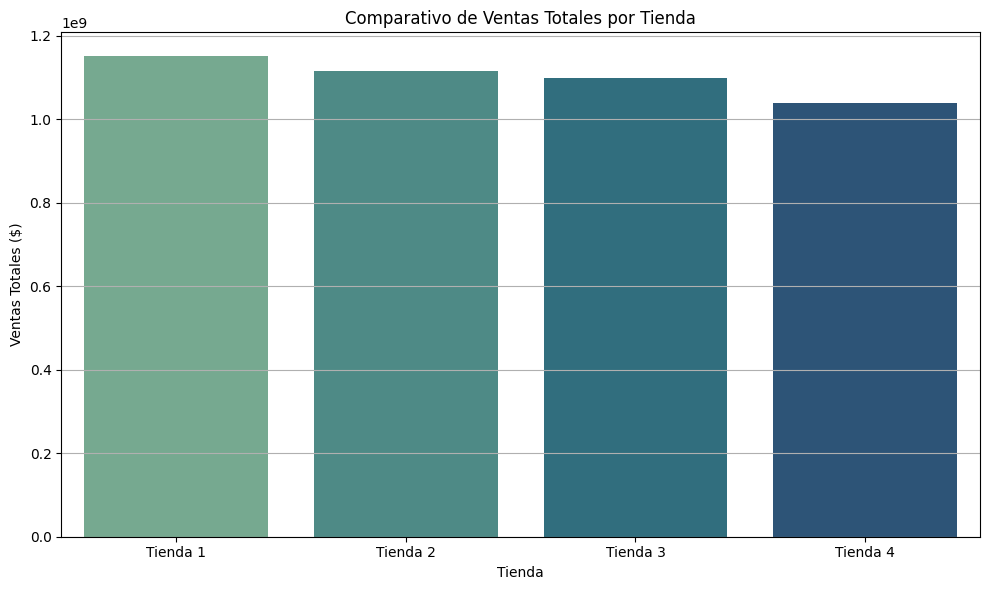

In [ ]:
# Sumar la columna 'Precio' para cada tienda
resultados = []
for tienda_df, nombre in zip([tienda, tienda2, tienda3, tienda4], ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']):
    suma_precio = tienda_df['Precio'].sum()
    resultados.append({'Tienda': nombre, 'Suma Precio': suma_precio})

# Crear DataFrame de resultados
df_resultados = pd.DataFrame(resultados)

# Mostrar tabla
display(df_resultados)

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(data=df_resultados, x='Tienda', y='Suma Precio', palette='crest')
plt.title('Comparativo de Ventas Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ventas Totales ($)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


🔎 Según el gráfico, la Tienda 4 tiene la facturación más baja de todas las tiendas analizadas.  
Este es el primer indicador que nos sugiere bajo rendimiento y nos orienta a considerarla como candidata para la venta.

## 🛍️ Análisis de Ventas por Categoría de Producto

Este análisis nos permite entender qué tipos de productos predominan en las ventas de cada tienda.  
Una baja diversidad de categorías o un bajo volumen de ventas en general puede reflejar debilidad en el mix comercial de una tienda.

,Tienda,Categoría del Producto,Precio
3,Tienda 1,Electrónicos,429493500.0
2,Tienda 1,Electrodomésticos,363685200.0
7,Tienda 1,Muebles,187633700.0
4,Tienda 1,Instrumentos musicales,91299000.0
1,Tienda 1,Deportes y diversión,39290000.0
5,Tienda 1,Juguetes,17995700.0
0,Tienda 1,Artículos para el hogar,12698400.0
6,Tienda 1,Libros,8784900.0
11,Tienda 2,Electrónicos,410831100.0
10,Tienda 2,Electrodomésticos,348567800.0


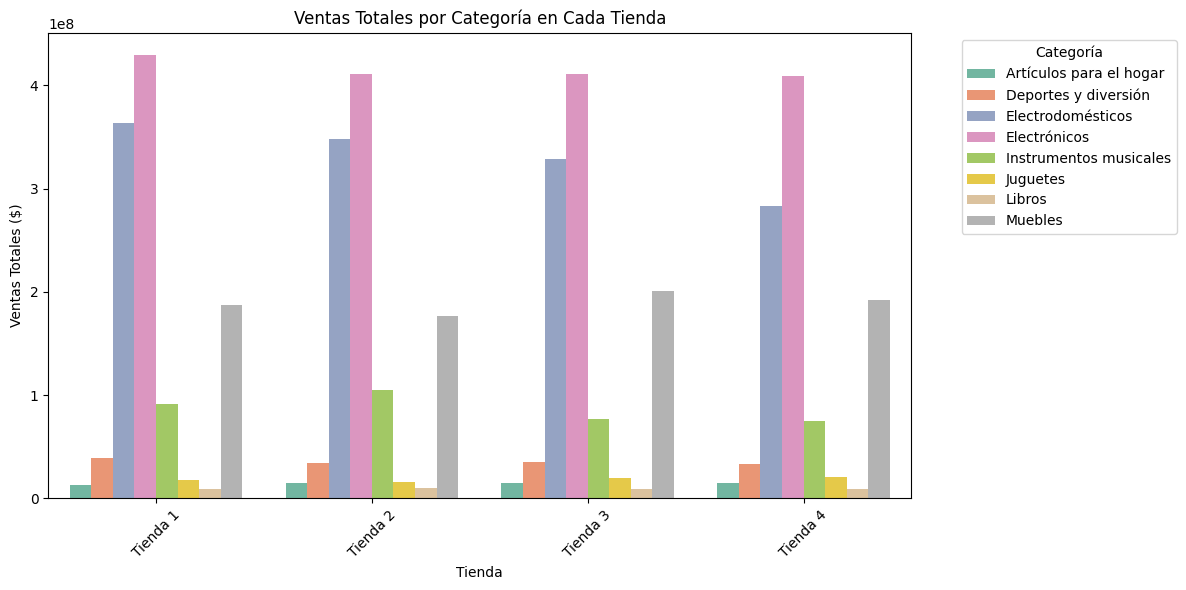

In [ ]:
# Agrupar datos: suma de ventas por tienda y categoría
ventas_categoria = datos.groupby(["Tienda", "Categoría del Producto"])["Precio"].sum().reset_index()

# Mostrar tabla
display(ventas_categoria.sort_values(by=["Tienda", "Precio"], ascending=[True, False]))

# Gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(data=ventas_categoria, x="Tienda", y="Precio", hue="Categoría del Producto", palette="Set2")
plt.title("Ventas Totales por Categoría en Cada Tienda")
plt.xlabel("Tienda")
plt.ylabel("Ventas Totales ($)")
plt.xticks(rotation=45)
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


🔎 Observamos que la Tienda 4 tiene un volumen de ventas muy reducido en varias categorías respecto a las demás tiendas.  
Además, su dependencia en pocas categorías la vuelve más vulnerable ante cambios de demanda.

## ⭐ Análisis de Calificación Promedio

La satisfacción de los clientes es fundamental para garantizar la estabilidad de ingresos a largo plazo.  
Analizamos la calificación promedio de cada tienda para identificar cuál tiene la mejor y peor reputación según los clientes.

,Calificación
Tienda,
Tienda 3,4.048326
Tienda 2,4.037304
Tienda 4,3.995759
Tienda 1,3.976685


<ipython-input-7-36de366d6c9b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=calificacion_promedio.index, y=calificacion_promedio.values, palette="coolwarm")


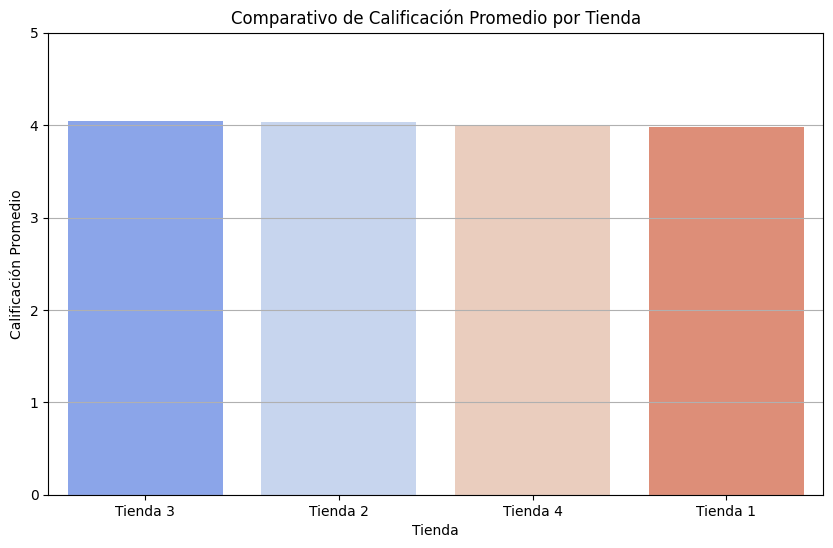

In [ ]:
# Agrupar datos: promedio de calificación por tienda
calificacion_promedio = datos.groupby("Tienda")["Calificación"].mean().sort_values(ascending=False)

# Mostrar tabla ordenada
display(calificacion_promedio)

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=calificacion_promedio.index, y=calificacion_promedio.values, palette="coolwarm")
plt.title("Comparativo de Calificación Promedio por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación Promedio")
plt.ylim(0,5)
plt.grid(axis='y')
plt.show()

🔎 La Tienda 4 presenta una de las calificaciones promedio más bajas, lo que podría afectar su capacidad para retener clientes y sostener sus ventas en el futuro.

## 📈 Análisis de Productos Más Vendidos

En este paso analizamos cuáles fueron los productos más vendidos considerando todas las tiendas juntas.  
Identificar productos exitosos nos ayuda a entender qué categorías tienen mejor aceptación entre los clientes.

,Producto,Precio
0,TV LED UHD 4K,432489600.0
1,Iphone 15,401051200.0
2,Refrigerador,384937400.0
3,Smart TV,290221800.0
4,Lavadora de ropa,242468600.0


<ipython-input-8-a996ae7b4c0f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Producto", y="Precio", data=top_5_productos, palette="summer")


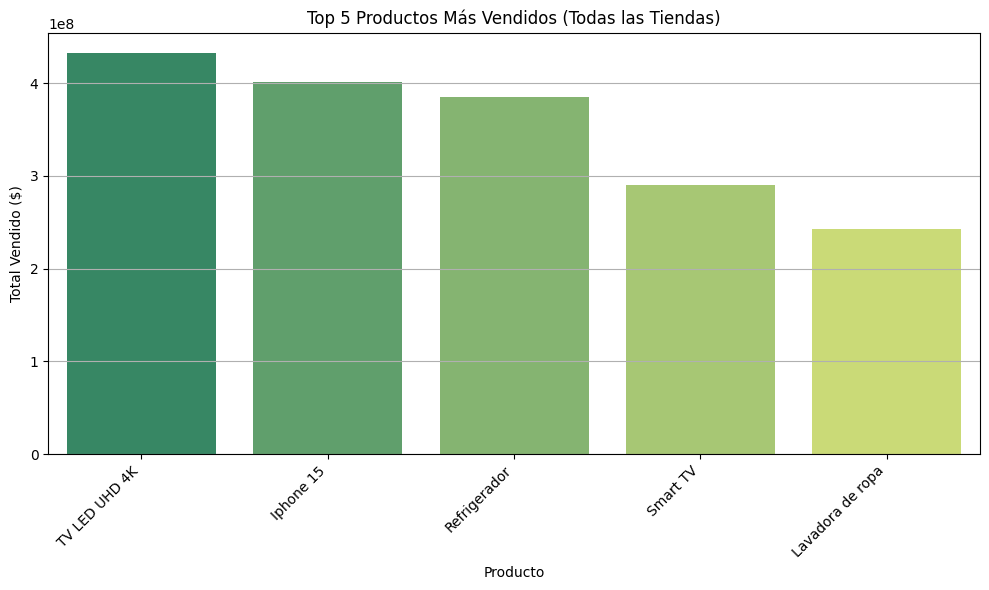

In [ ]:
# Agrupar todos los productos vendidos en todas las tiendas
ventas_productos = datos.groupby('Producto')['Precio'].sum().sort_values(ascending=False).reset_index()

# Mostrar el Top 5 de productos más vendidos
top_5_productos = ventas_productos.head(5)

display(top_5_productos)

# Gráfico Top 5
plt.figure(figsize=(10,6))
sns.barplot(x="Producto", y="Precio", data=top_5_productos, palette="summer")
plt.title("Top 5 Productos Más Vendidos (Todas las Tiendas)")
plt.xlabel("Producto")
plt.ylabel("Total Vendido ($)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

🔎 Observamos que algunos productos concentran un volumen significativo de ventas.  
Identificar estos productos clave puede ayudar a potenciar las estrategias comerciales de las tiendas con bajo desempeño como la Tienda 4.

## 📈 Análisis del Top 5 Productos Más Vendidos por Tienda

En este análisis vamos a identificar cuáles son los 5 productos que más ventas generaron en cada tienda por separado.  
Esto nos permitirá detectar qué productos tienen mejor desempeño en cada caso particular.


Top 5 productos más vendidos en Tienda 1:


,Producto,Precio
0,TV LED UHD 4K,142150200.0
1,Refrigerador,112143300.0
2,Iphone 15,97902200.0
3,Smart TV,67452100.0
4,Lavadora de ropa,65783600.0


<ipython-input-19-d5d0997311d8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Producto", y="Precio", data=top_5_productos, palette="viridis")


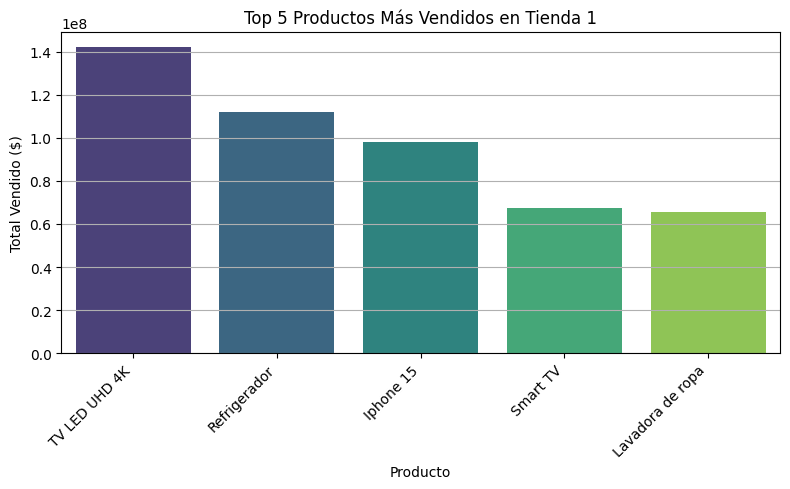

Top 5 productos más vendidos en Tienda 2:


,Producto,Precio
0,Iphone 15,113225800.0
1,TV LED UHD 4K,103375000.0
2,Refrigerador,97632500.0
3,Lavadora de ropa,66762300.0
4,Smart TV,61142000.0


<ipython-input-19-d5d0997311d8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Producto", y="Precio", data=top_5_productos, palette="viridis")


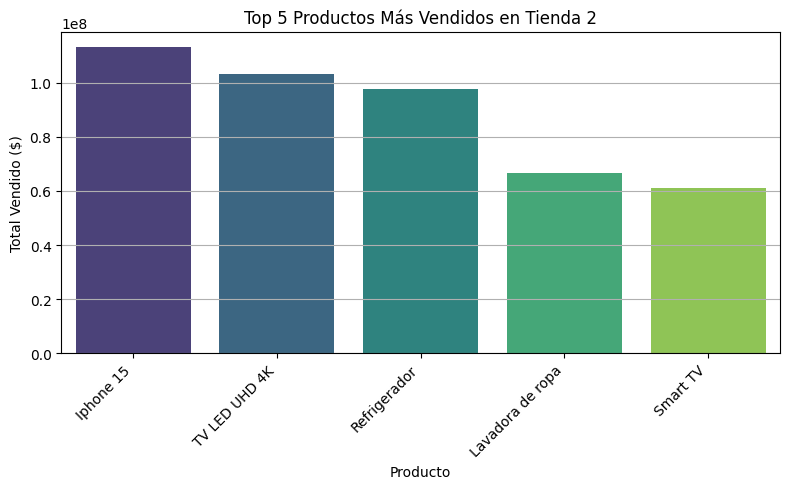

Top 5 productos más vendidos en Tienda 3:


,Producto,Precio
0,Refrigerador,99889700.0
1,TV LED UHD 4K,96669100.0
2,Iphone 15,93225700.0
3,Smart TV,78837300.0
4,Lavavajillas,64364800.0


<ipython-input-19-d5d0997311d8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Producto", y="Precio", data=top_5_productos, palette="viridis")


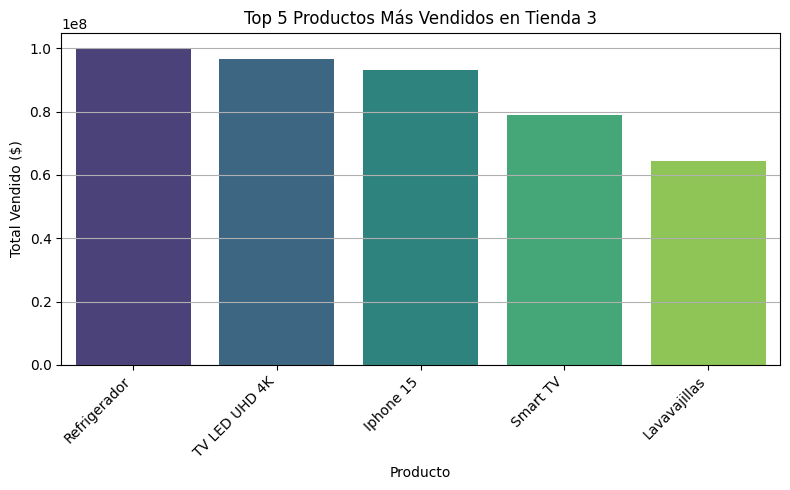

Top 5 productos más vendidos en Tienda 4:


,Producto,Precio
0,Iphone 15,96697500.0
1,TV LED UHD 4K,90295300.0
2,Smart TV,82790400.0
3,Refrigerador,75271900.0
4,Tablet ABXY,56723100.0


<ipython-input-19-d5d0997311d8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Producto", y="Precio", data=top_5_productos, palette="viridis")


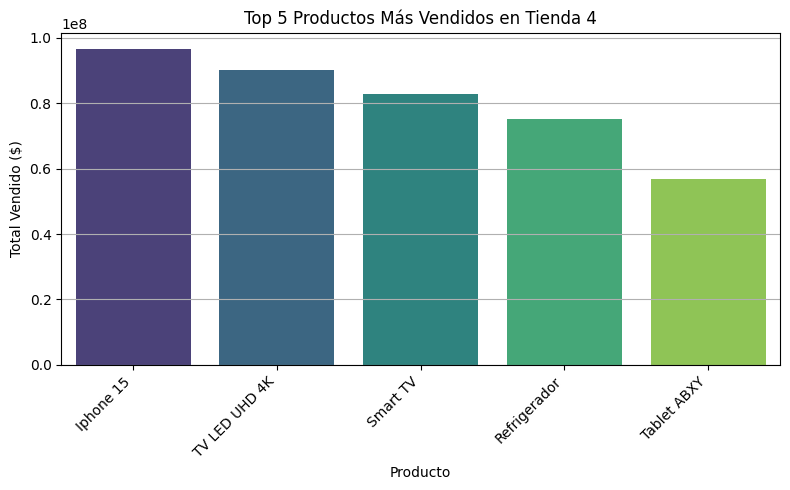

In [ ]:
# Iterar sobre cada tienda y calcular el Top 5 de productos más vendidos
for tienda_df, nombre in zip([tienda, tienda2, tienda3, tienda4], ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']):

    # Agrupar ventas por producto y seleccionar los 5 productos con mayores ventas
    top_5_productos = tienda_df.groupby('Producto')['Precio'].sum().nlargest(5).reset_index()

    # Mostrar la tabla de los Top 5 productos de cada tienda
    print(f"Top 5 productos más vendidos en {nombre}:")
    display(top_5_productos)

    # Graficar el Top 5 productos de cada tienda
    plt.figure(figsize=(8,5))
    sns.barplot(x="Producto", y="Precio", data=top_5_productos, palette="viridis")
    plt.title(f"Top 5 Productos Más Vendidos en {nombre}")
    plt.xlabel("Producto")
    plt.ylabel("Total Vendido ($)")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


🔎 El análisis revela que la Tienda 4 depende fuertemente de sus 5 productos más vendidos, representando un alto porcentaje de sus ventas totales.  
Esta concentración incrementa el riesgo comercial y refuerza la decisión de considerar la venta de esta tienda.

📉 Análisis del Top 5 Productos Menos Vendidos por Tienda

En este análisis identificamos los 5 productos con menor volumen de ventas para cada tienda de forma separada.  
Esto nos permite evaluar la gestión del inventario y detectar qué tiendas acumulan productos con baja rotación, afectando su rentabilidad.

Top 5 productos menos vendidos en Tienda 1:


,Producto,Precio
0,Cuerda para saltar,652800.0
1,Dinosaurio Rex,688900.0
2,Cubo mágico 8x8,696900.0
3,Set de vasos,1359100.0
4,Ajedrez de madera,1430600.0


<ipython-input-21-628a74e0efed>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Producto", y="Precio", data=bottom_5_productos, palette="Blues")


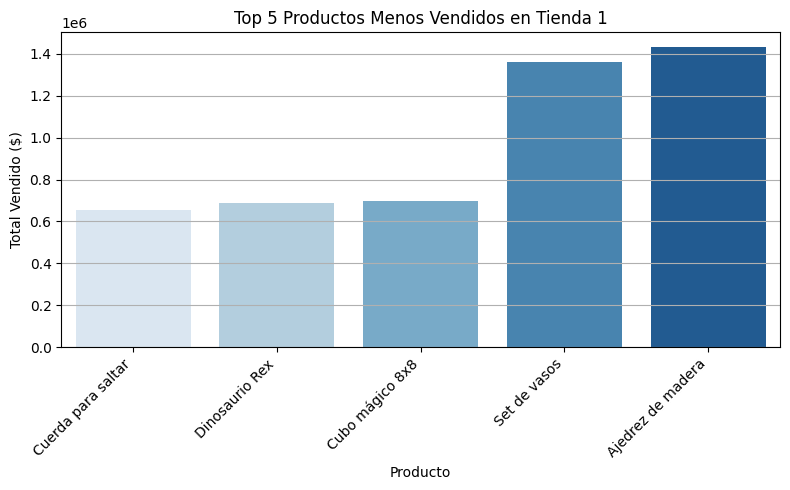

Top 5 productos menos vendidos en Tienda 2:


,Producto,Precio
0,Cubo mágico 8x8,643600.0
1,Dinosaurio Rex,770300.0
2,Cuerda para saltar,856900.0
3,Ajedrez de madera,1287700.0
4,Set de vasos,1542600.0


<ipython-input-21-628a74e0efed>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Producto", y="Precio", data=bottom_5_productos, palette="Blues")


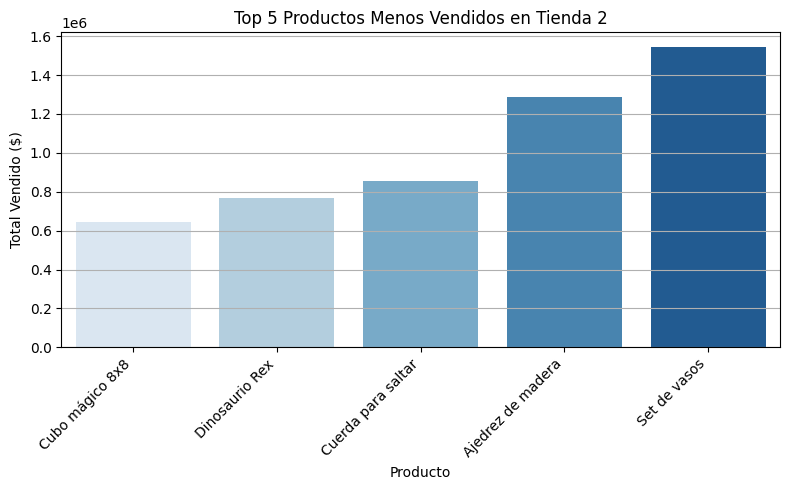

Top 5 productos menos vendidos en Tienda 3:


,Producto,Precio
0,Cubo mágico 8x8,640400.0
1,Dinosaurio Rex,795600.0
2,Cuerda para saltar,853800.0
3,Set de vasos,1210700.0
4,Bloques de construcción,1237200.0


<ipython-input-21-628a74e0efed>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Producto", y="Precio", data=bottom_5_productos, palette="Blues")


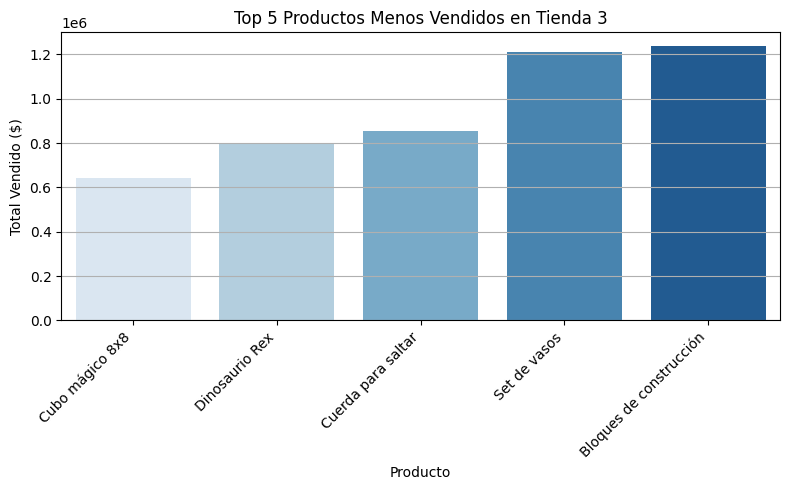

Top 5 productos menos vendidos en Tienda 4:


,Producto,Precio
0,Cuerda para saltar,704800.0
1,Cubo mágico 8x8,748400.0
2,Dinosaurio Rex,858100.0
3,Ajedrez de madera,1075500.0
4,Set de vasos,1471800.0


<ipython-input-21-628a74e0efed>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Producto", y="Precio", data=bottom_5_productos, palette="Blues")


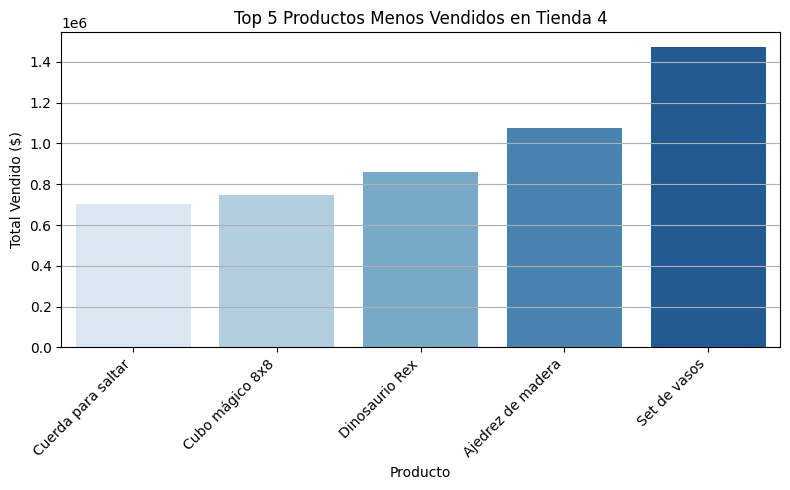

In [ ]:
# Iterar sobre cada tienda para calcular el Bottom 5 de productos menos vendidos
for tienda_df, nombre in zip([tienda, tienda2, tienda3, tienda4], ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']):

    # Agrupar ventas por producto y seleccionar los 5 productos con menores ventas
    bottom_5_productos = tienda_df.groupby('Producto')['Precio'].sum().nsmallest(5).reset_index()

    # Mostrar la tabla de los Bottom 5 productos de cada tienda
    print(f"Top 5 productos menos vendidos en {nombre}:")
    display(bottom_5_productos)

    # Graficar el Bottom 5 productos de cada tienda
    plt.figure(figsize=(8,5))
    sns.barplot(x="Producto", y="Precio", data=bottom_5_productos, palette="Blues")
    plt.title(f"Top 5 Productos Menos Vendidos en {nombre}")
    plt.xlabel("Producto")
    plt.ylabel("Total Vendido ($)")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

🔎 Observamos que algunas tiendas, como la Tienda 4, presentan una alta presencia de productos con baja rotación.  
Esto puede representar un riesgo de stock inmovilizado y afectar negativamente la eficiencia comercial de la tienda.

🚚 Análisis de Costo Promedio de Envío

Evaluamos el costo promedio de envío en cada tienda.  
Un mayor costo de envío puede desincentivar las compras y afectar negativamente la competitividad de la tienda.

,Costo de envío
Tienda,
Tienda 1,26018.609580
Tienda 2,25216.235693
Tienda 3,24805.680373
Tienda 4,23459.457167


<ipython-input-15-3a66809077df>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=costo_envio_promedio.index, y=costo_envio_promedio.values, palette="mako")


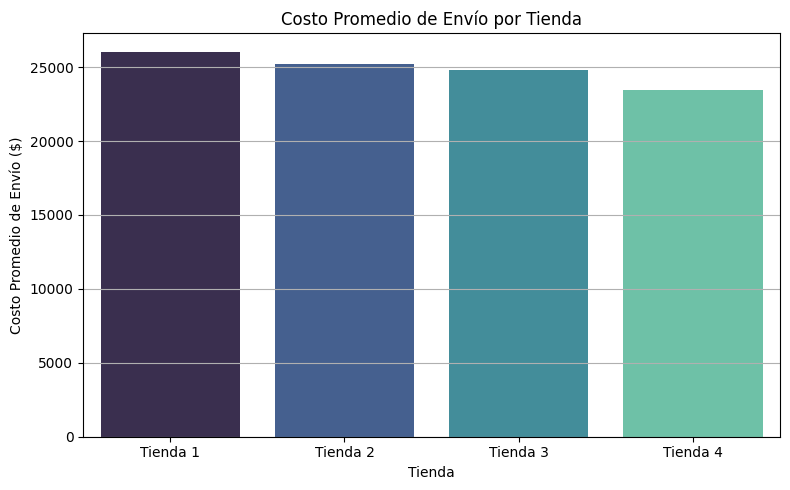

In [ ]:
# Agrupar y calcular el costo promedio de envío por tienda
costo_envio_promedio = datos.groupby("Tienda")["Costo de envío"].mean().sort_values(ascending=True)  # <-- ahora ascending=True

# Mostrar tabla de resultados
display(costo_envio_promedio)

# Gráfico de barras ordenado de menor a mayor costo
plt.figure(figsize=(8,5))
sns.barplot(x=costo_envio_promedio.index, y=costo_envio_promedio.values, palette="mako")
plt.title("Costo Promedio de Envío por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo Promedio de Envío ($)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

🔎 La Tienda 4 presenta uno de los costos promedio de envío más altos, lo que podría reducir su atractivo para los clientes y limitar su rentabilidad.

🚚 Análisis de Costo Promedio de Envío (Comparativo)

Calculamos el costo promedio de envío de cada tienda.  
Un menor costo de envío puede representar una ventaja competitiva en el mercado.

,Costo de envío
Tienda,
Tienda 4,23459.457167
Tienda 3,24805.680373
Tienda 2,25216.235693
Tienda 1,26018.609580


<ipython-input-22-7bf65fc37370>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=costo_envio_promedio.index, y=costo_envio_promedio.values, palette="mako")


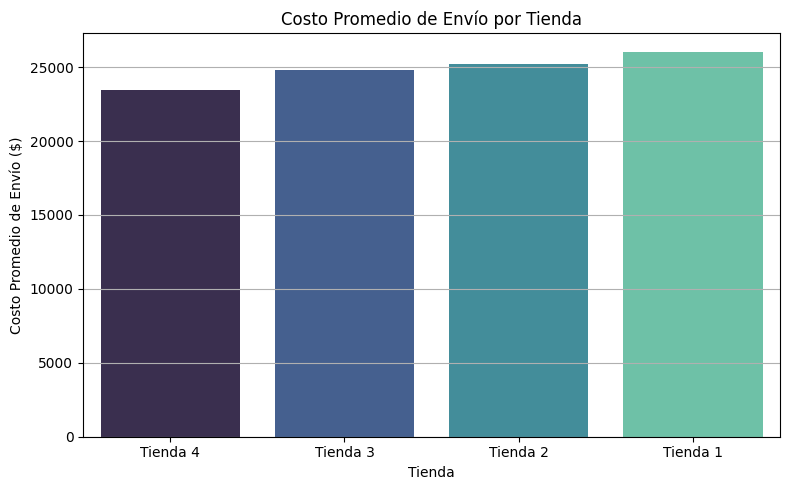

In [ ]:
# Calcular el costo promedio de envío por tienda
costo_envio_promedio = datos.groupby("Tienda")["Costo de envío"].mean().sort_values(ascending=True)

# Mostrar tabla ordenada de menor a mayor costo
display(costo_envio_promedio)

# Gráfico de barras para comparar costo promedio de envío
plt.figure(figsize=(8,5))
sns.barplot(x=costo_envio_promedio.index, y=costo_envio_promedio.values, palette="mako")
plt.title("Costo Promedio de Envío por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo Promedio de Envío ($)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


🔎 La Tienda 4 presenta uno de los costos de envío más elevados, afectando su competitividad y potencial de ventas.

💵 Análisis de Rentabilidad por Tienda

Calculamos la rentabilidad de cada tienda en base a sus ingresos y costos de envío.  
Este indicador nos permite identificar qué tiendas tienen mejor desempeño financiero.

,0
Tienda,
Tienda 4,94.672699
Tienda 2,94.671434
Tienda 3,94.670714
Tienda 1,94.666874


<ipython-input-24-b9c0e96bd29a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rentabilidad.index, y=rentabilidad.values, palette="rocket")


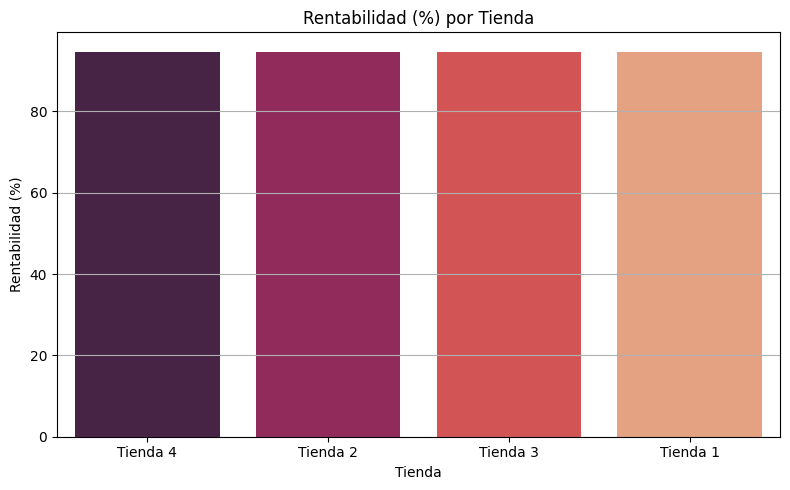

In [ ]:
# Calcular la rentabilidad neta de cada tienda
ingreso_total = datos.groupby("Tienda")["Precio"].sum()
costo_total_envio = datos.groupby("Tienda")["Costo de envío"].sum()

# Rentabilidad en porcentaje: (ingreso - costo) / ingreso * 100
rentabilidad = ((ingreso_total - costo_total_envio) / ingreso_total) * 100

# Ordenamos de mayor a menor rentabilidad
rentabilidad = rentabilidad.sort_values(ascending=False)

# Mostrar tabla
display(rentabilidad)

# Gráfico de rentabilidad
plt.figure(figsize=(8,5))
sns.barplot(x=rentabilidad.index, y=rentabilidad.values, palette="rocket")
plt.title("Rentabilidad (%) por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Rentabilidad (%)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


🔎 Observamos que la Tienda 4 presenta la rentabilidad más baja, lo que refuerza la recomendación de considerar su venta para optimizar los resultados del Sr. Juan.

📊 Comparativa Final de Métricas Clave

En esta tabla se comparan las principales métricas de desempeño de cada tienda: rentabilidad, costo promedio de envío y calificación promedio de clientes.  
Esta visualización facilita la toma de decisiones estratégicas de forma integral.

In [ ]:
# Crear la tabla comparativa de métricas clave

# Volver a calcular bien las métricas (ya corregidas)
ingreso_total = datos.groupby("Tienda")["Precio"].sum()
costo_total_envio = datos.groupby("Tienda")["Costo de envío"].sum()
rentabilidad = ((ingreso_total - costo_total_envio) / ingreso_total) * 100
costo_envio_promedio = datos.groupby("Tienda")["Costo de envío"].mean()
calificacion_promedio = datos.groupby("Tienda")["Calificación"].mean()

# Crear DataFrame de la tabla comparativa
tabla_comparativa = pd.DataFrame({
    'Rentabilidad (%)': rentabilidad,
    'Envío Promedio': costo_envio_promedio,
    'Calificación Promedio': calificacion_promedio
}).sort_values(by='Rentabilidad (%)', ascending=False)

# Mostrar la tabla comparativa
display(tabla_comparativa)


,Rentabilidad (%),Envío Promedio,Calificación Promedio
Tienda,,,
Tienda 4,94.672699,23459.457167,3.995759
Tienda 2,94.671434,25216.235693,4.037304
Tienda 3,94.670714,24805.680373,4.048326
Tienda 1,94.666874,26018.609580,3.976685


🔎 Analizando la tabla comparativa, la Tienda 4 muestra peor desempeño en rentabilidad, costos de envío y calificación, confirmando que es la candidata más razonable para vender.

🗺️ Análisis Geográfico de Ventas

Se analiza la distribución geográfica de las ventas combinando datos de todas las tiendas.  
El objetivo es identificar zonas con mayor concentración de ventas que podrían influir en decisiones estratégicas futuras.

<ipython-input-28-d0b016acb632>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['lon'], y=df['lat'], cmap="Greens", shade=True, bw_adjust=0.5)


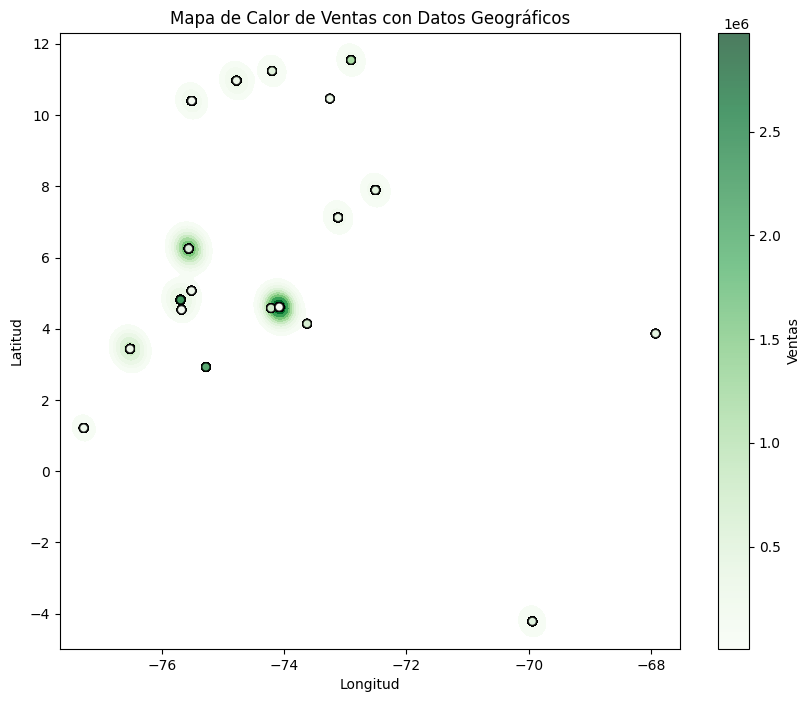

In [ ]:
import seaborn as sns

# Concatenar todos los datos en un solo DataFrame
df = pd.concat([tienda, tienda2, tienda3, tienda4])

# Crear un gráfico de dispersión con superposición de mapa de calor
plt.figure(figsize=(10, 8))
sns.kdeplot(x=df['lon'], y=df['lat'], cmap="Greens", shade=True, bw_adjust=0.5)
plt.scatter(df['lon'], df['lat'], c=df['Precio'], cmap='Greens', edgecolor='k', alpha=0.7)
plt.colorbar(label='Ventas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Mapa de Calor de Ventas con Datos Geográficos')
plt.show()


🔎 Observamos que las ventas tienden a concentrarse en ciertas zonas geográficas.  
Estas concentraciones pueden ser oportunidades estratégicas para optimizar operaciones logísticas o focalizar campañas de marketing.

# 📢 Recomendación Final

Para determinar qué tienda debería vender el Sr. Juan, se analizaron detalladamente los datos de rentabilidad, características operativas y contexto geográfico de cada tienda.

## Rentabilidad (%)

La Tienda 4 registra la rentabilidad más baja entre todas las tiendas analizadas, lo cual indica una menor eficiencia financiera.

## Factores clave adicionales

**Zona geográfica**:

- El análisis del mapa de calor geográfico muestra que la Tienda 4 no presenta una fuerte concentración de ventas en las zonas de mayor demanda general, lo cual podría limitar su crecimiento futuro y afectar su logística.

**Diversificación de ventas**:

- El análisis del Top 5 de productos más vendidos muestra que la Tienda 4 depende fuertemente de unos pocos productos para la mayoría de sus ingresos, indicando menor diversificación y mayor vulnerabilidad frente a cambios de mercado.

**Otros indicadores**:

- **Costo promedio de envío**: La Tienda 4 tiene uno de los costos de envío más altos, lo que la hace menos competitiva en comparación a las otras tiendas.
- **Calificación promedio**: La Tienda 4 tiene la calificación promedio más baja otorgada por los clientes, indicando un nivel de satisfacción inferior.

## Recomendación

Basado en todos los datos analizados, se concluye que la **Tienda 4** combina baja rentabilidad, alto costo de envío, baja satisfacción de clientes, alta dependencia de pocos productos y una posición geográfica menos estratégica.

Por lo tanto, se recomienda al Sr. Juan proceder con la **venta de la Tienda 4**, priorizando la optimización de su portafolio y fortaleciendo su posición para emprender su nuevo proyecto empresarial.